In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas.util.testing as tm
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#peek at data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19789,30559.0,-0.575348,1.106119,-0.482730,-0.434038,1.420606,2.367524,-0.750675,-2.584121,-0.216560,...,3.118549,-0.837998,0.044241,-2.270559,1.301317,-0.170753,0.180353,0.069176,0.89,0
159404,112426.0,2.066633,-0.147655,-1.153836,0.395394,-0.179396,-1.156491,0.105555,-0.259633,0.728933,...,-0.310820,-0.823746,0.333683,-0.142348,-0.319374,0.208727,-0.079104,-0.063483,4.49,0
275757,166708.0,1.911482,-0.241555,-1.848223,0.410230,0.129794,-0.793872,0.028904,-0.094251,1.239142,...,-0.231825,-0.640067,0.188253,0.518387,-0.125566,-0.117348,-0.029526,-0.008302,68.69,0
154550,101967.0,-1.239502,-0.019905,0.003374,-0.272465,1.405156,-0.928614,0.780034,-0.321678,1.458627,...,-0.407260,-0.460627,0.505758,0.622202,-0.717060,0.090317,0.233236,0.294278,54.40,0
45500,42377.0,-1.903950,0.044011,0.119556,-0.821629,-0.189201,-0.813836,-0.343056,0.945580,0.198819,...,0.269541,0.471572,-0.216221,0.046227,0.270911,-0.486229,-0.174053,-0.231701,1.00,0


In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

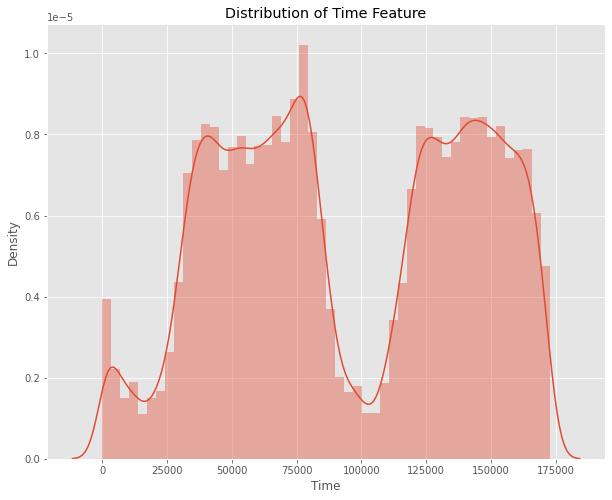

In [6]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

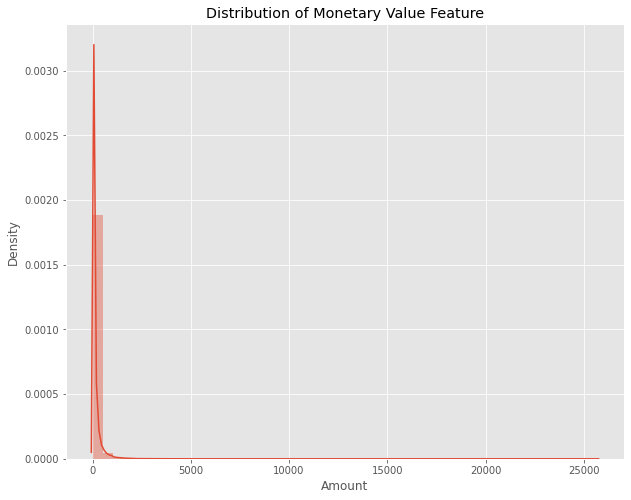

In [7]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [8]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

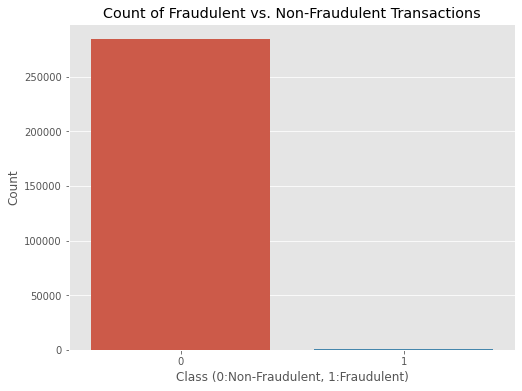

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [10]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.136e-16,-1.228e-15,-9.215e-16,1.813e-17,-6.507e-16,-1.005e-15,-2.434e-16,-1.514e-16,...,-2.457e-16,-4.291e-16,6.169e-16,-4.425e-17,-9.606e-16,-1.581e-17,1.198e-16,2.083e-15,-2.277e-01,-1.013e-01
V2,-0.011,4.136e-16,1.000e+00,3.244e-16,-1.121e-15,5.158e-16,2.787e-16,2.056e-16,-5.377e-17,1.978e-17,...,-8.480e-17,1.526e-16,1.634e-16,1.248e-17,-4.479e-16,2.057e-16,-4.967e-16,-5.094e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.228e-15,3.244e-16,1.000e+00,4.711e-16,-6.539e-17,1.628e-15,4.895e-16,-1.269e-15,5.568e-16,...,5.706e-17,-1.134e-15,-4.983e-16,2.687e-19,-1.105e-15,-1.238e-16,1.046e-15,9.776e-16,-2.109e-01,-1.930e-01
V4,-0.105,-9.215e-16,-1.121e-15,4.711e-16,1.000e+00,-1.720e-15,-7.492e-16,-4.105e-16,5.697e-16,6.923e-16,...,-1.950e-16,-6.276e-17,9.164e-17,1.585e-16,6.071e-16,-4.247e-16,3.977e-17,-2.761e-18,9.873e-02,1.334e-01
V5,0.173,1.813e-17,5.158e-16,-6.539e-17,-1.720e-15,1.000e+00,2.408e-16,2.716e-16,7.437e-16,7.392e-16,...,-3.921e-16,1.254e-16,-8.429e-18,-1.149e-15,4.809e-16,4.320e-16,6.590e-16,-5.614e-18,-3.864e-01,-9.497e-02
V6,-0.063,-6.507e-16,2.787e-16,1.628e-15,-7.492e-16,2.408e-16,1.000e+00,1.192e-16,-1.104e-16,4.131e-16,...,5.833e-17,-4.705e-19,1.047e-16,-1.072e-15,4.563e-16,-1.357e-16,-4.452e-16,2.595e-16,2.160e-01,-4.364e-02
V7,0.085,-1.005e-15,2.056e-16,4.895e-16,-4.105e-16,2.716e-16,1.192e-16,1.000e+00,3.344e-16,1.123e-15,...,-2.028e-16,-8.899e-16,-4.387e-16,7.435e-18,-3.094e-16,-9.658e-16,-1.782e-15,-2.777e-16,3.973e-01,-1.873e-01
V8,-0.037,-2.434e-16,-5.377e-17,-1.269e-15,5.697e-16,7.437e-16,-1.104e-16,3.344e-16,1.000e+00,4.356e-16,...,3.893e-16,2.027e-16,6.377e-17,-1.047e-16,-4.653e-16,-1.727e-16,1.300e-16,-6.201e-16,-1.031e-01,1.988e-02
V9,-0.009,-1.514e-16,1.978e-17,5.568e-16,6.923e-16,7.392e-16,4.131e-16,1.123e-15,4.356e-16,1.000e+00,...,1.937e-16,-7.072e-16,-5.214e-16,-1.430e-16,6.758e-16,-7.889e-16,-6.710e-17,1.111e-15,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

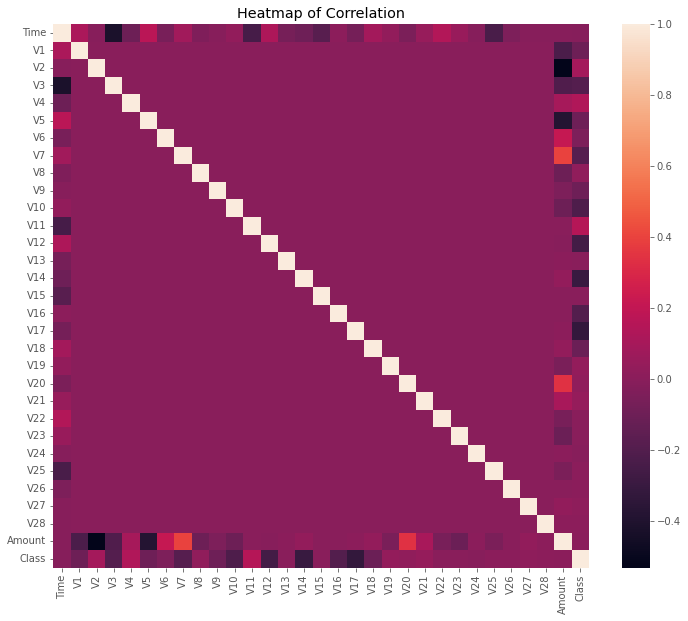

In [11]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [12]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [14]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [15]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
209183,137446.0,-0.104,1.758,0.324,4.222,1.333,0.861,0.981,-0.093,-2.591,...,-0.295,0.788,-0.333,0.577,-0.062,0.197,10.0,0,-0.313,0.898
7721,10744.0,-1.053,0.327,1.789,-0.505,-0.167,-0.924,0.777,-0.450,1.972,...,0.105,0.736,-0.245,0.843,-0.105,-0.039,53.9,0,-0.138,-1.770
5219,5009.0,-0.550,0.746,1.735,0.949,-1.740,0.918,-1.565,-3.148,0.585,...,0.126,0.499,0.924,0.003,0.363,0.192,79.0,0,-0.037,-1.891
143266,85232.0,1.509,-0.945,0.734,-1.343,-1.676,-0.911,-1.051,-0.201,-1.804,...,0.176,0.333,0.148,-0.411,0.047,0.030,10.0,0,-0.313,-0.202
161601,114355.0,1.946,0.403,-0.432,3.866,0.448,0.636,-0.104,-0.009,-0.384,...,-0.027,-0.674,0.247,0.175,0.005,-0.052,0.0,0,-0.353,0.411


In [16]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [17]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256395, 31)
Test Shape: (28412, 31)


In [18]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [19]:

#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 454 fraudulent transactions in the train data.


In [20]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [21]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
88643,1.257,0.368,0.308,0.690,-0.352,-1.066,0.100,-0.214,0.004,-0.288,...,-0.815,0.126,0.345,0.223,0.094,-0.022,0.031,0,-0.346,-0.592
83791,1.291,0.276,-0.162,0.304,0.266,-0.076,-0.029,0.010,-0.169,-0.117,...,-0.922,-0.031,-0.874,0.346,0.149,-0.028,0.009,0,-0.337,-0.643
25216,-10.601,-9.998,-0.463,1.703,2.295,-0.565,1.538,-2.386,4.278,3.589,...,0.596,0.795,0.131,0.234,0.712,-1.360,1.582,0,0.713,-1.263
112795,-1.238,-0.106,0.594,-1.939,-1.167,1.340,0.062,0.468,-2.600,0.698,...,0.747,-0.137,-0.574,-0.215,-0.036,-0.176,-0.072,0,0.350,-0.361
250188,-0.440,1.101,-0.036,-0.877,0.514,-0.678,0.834,0.007,0.166,0.391,...,-0.598,0.041,-0.362,-0.389,0.151,0.451,0.210,0,-0.343,1.540


In [22]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [23]:
subsample = pd.concat([selected, fraud])
len(subsample)

908

In [24]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,0.083,1.023,-0.325,-0.642,0.986,-0.476,0.918,0.016,-0.417,-0.696,...,-0.623,0.104,0.619,-0.459,0.090,0.225,0.076,0,-0.327,0.377
1,1.922,0.679,-1.064,3.620,0.793,-0.307,0.571,-0.246,-1.322,1.501,...,-0.543,0.219,-0.482,-0.104,-0.227,-0.056,-0.048,0,-0.227,0.529
2,-6.186,7.103,-13.030,8.011,-7.885,-3.975,-12.230,4.971,-4.248,-12.965,...,0.482,0.481,0.360,-0.293,-0.199,-0.204,0.399,1,-0.174,-0.020
3,-0.430,0.986,0.646,0.317,0.616,-1.347,1.078,-0.162,-0.493,-1.040,...,-0.208,-0.164,0.255,0.455,-0.505,-0.039,-0.006,1,-0.233,-0.417
4,-0.147,-0.008,0.157,-1.809,-0.064,-0.601,-0.238,-0.095,1.901,-0.731,...,-0.509,0.050,0.444,-0.779,-0.513,-0.411,-0.040,0,-0.310,0.664
5,0.776,-0.021,0.921,2.489,-0.379,0.326,-0.030,0.188,-0.912,0.704,...,-0.485,0.062,0.178,-0.002,-0.275,-0.008,0.049,0,0.266,-0.392
6,0.140,1.019,0.247,0.836,0.294,-0.849,0.812,-0.042,-0.575,0.417,...,0.608,0.012,0.308,-0.790,-0.428,0.428,0.217,0,-0.350,-0.401
7,-1.466,1.496,0.998,-0.126,0.176,-0.469,-0.058,-2.539,-0.637,0.171,...,-1.690,0.545,0.473,-0.901,-0.291,0.038,0.157,0,-0.321,-0.652
8,-0.693,1.049,0.092,-0.430,0.034,-0.115,0.488,0.197,-0.454,-0.375,...,0.047,-0.229,-0.925,-0.378,1.097,-0.293,0.043,0,-0.114,-0.305
9,-16.599,10.542,-19.819,6.017,-13.026,-4.129,-14.119,11.161,-4.100,-9.223,...,-1.152,-0.680,0.108,1.067,-0.234,1.708,0.511,1,0.047,-1.465


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

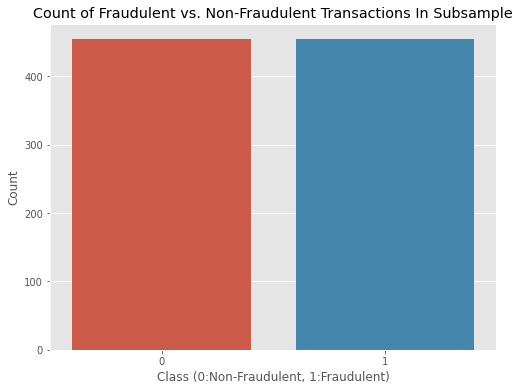

In [25]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [26]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.432
V2,0.496
V3,-0.574
V4,0.707
V5,-0.389
V6,-0.373
V7,-0.480
V8,0.047
V9,-0.554
V10,-0.625


In [27]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.574
V9,-0.554
V10,-0.625
V12,-0.684
V14,-0.742
V16,-0.597
V17,-0.561


In [28]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.707
V11,0.680
Class,1.000


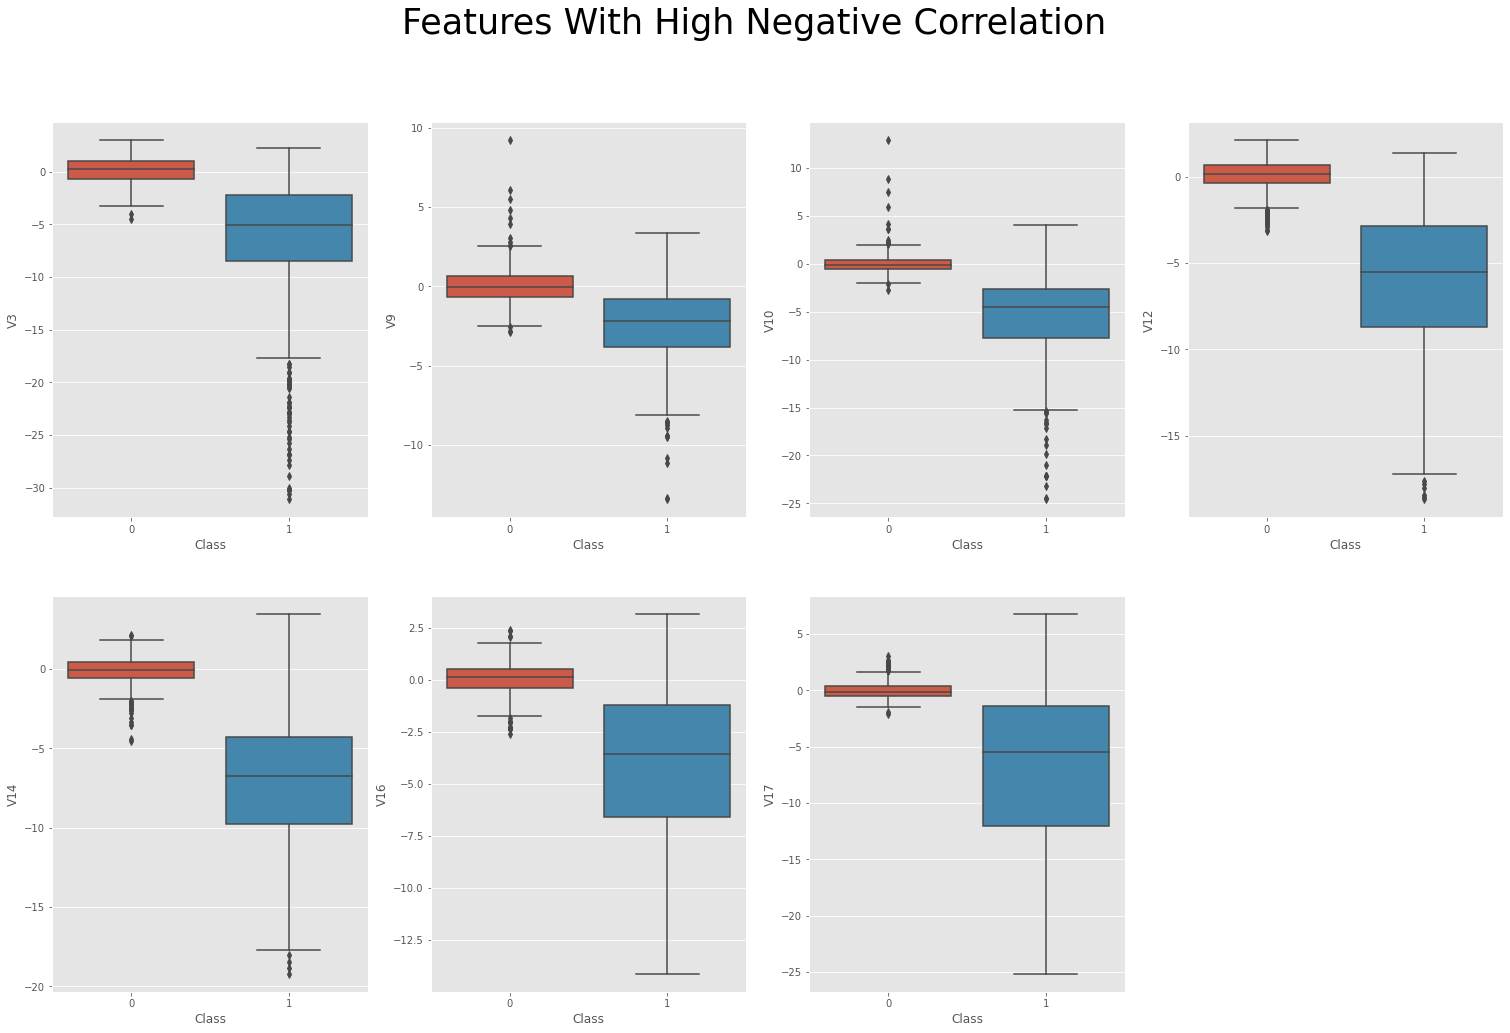

In [29]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

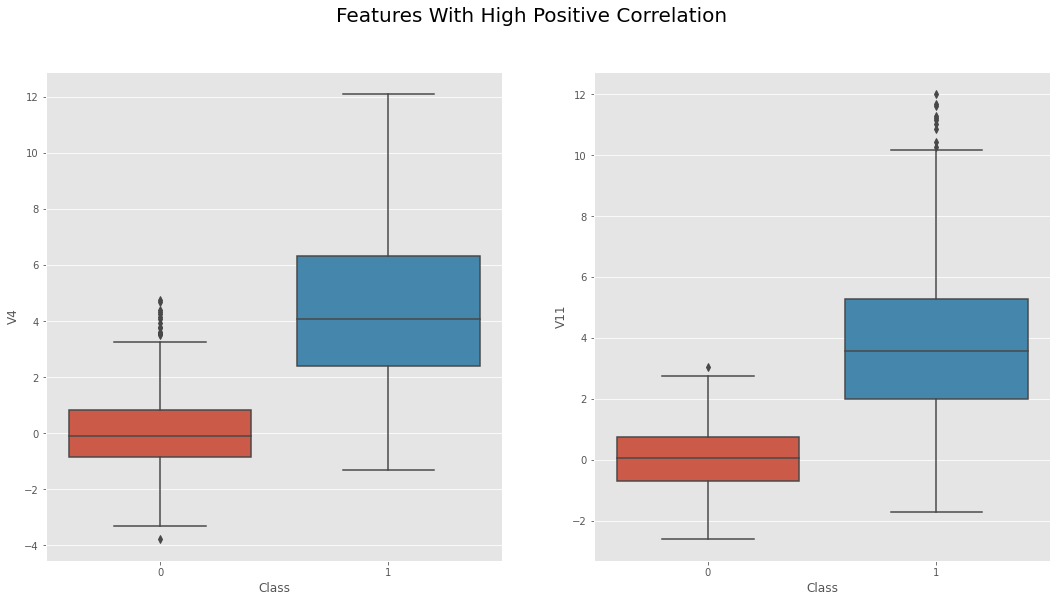

In [30]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [31]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [32]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 908 transactions by 267 transactions to 641 transactions.


In [33]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [34]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


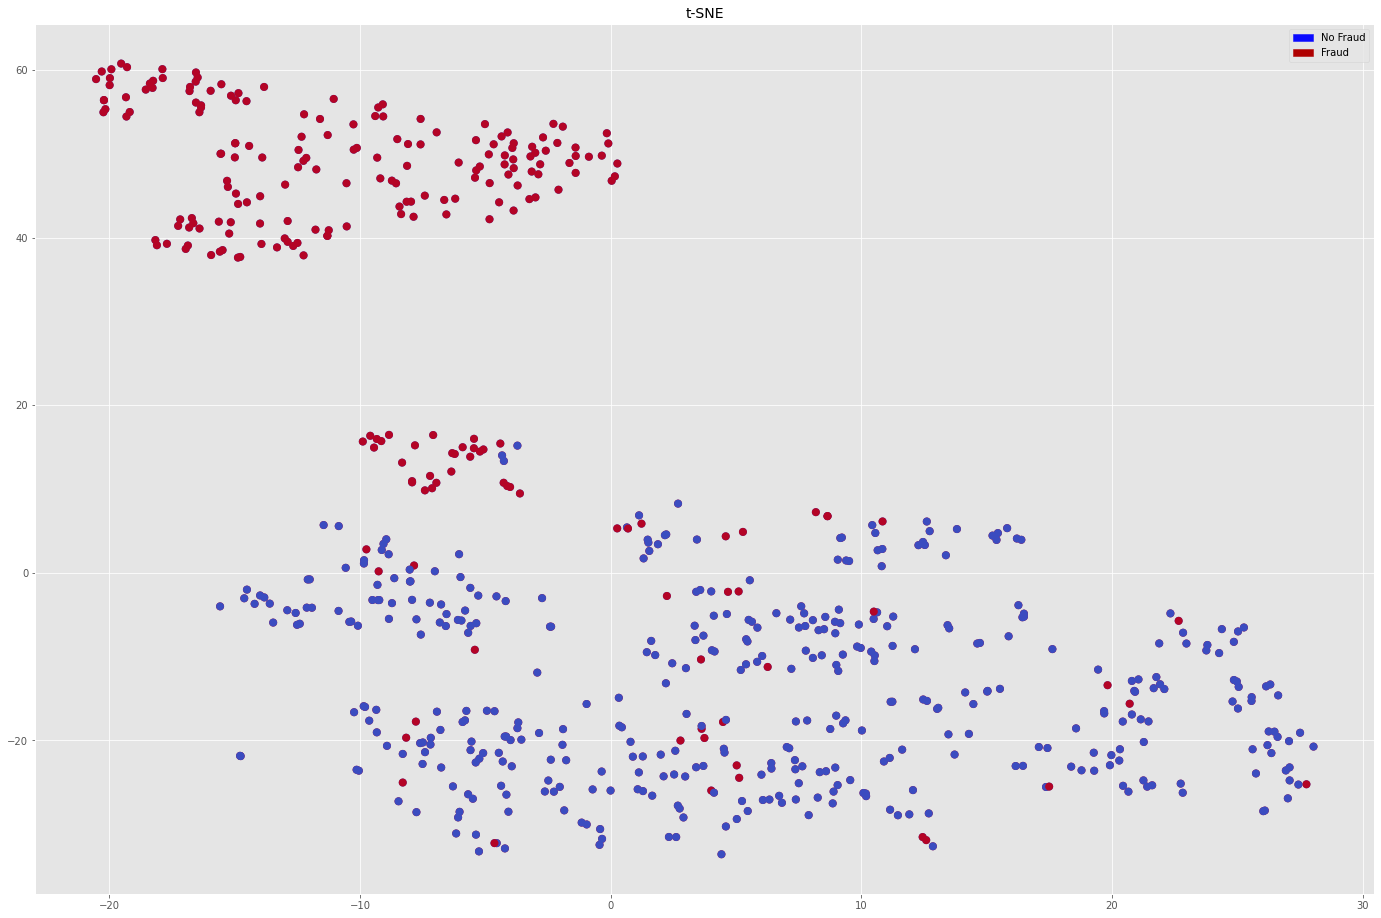

In [35]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [36]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [37]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [39]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (512, 30) (129, 30) 

Y_shapes:
 Y_train: Y_validation:
 (512,) (129,)


In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.962585 (0.031262)
LDA: 0.961598 (0.026310)
KNN: 0.951087 (0.039153)
CART: 0.893185 (0.038895)
SVM: 0.962707 (0.030931)
XGB: 0.963335 (0.027173)
RF: 0.965059 (0.020559)


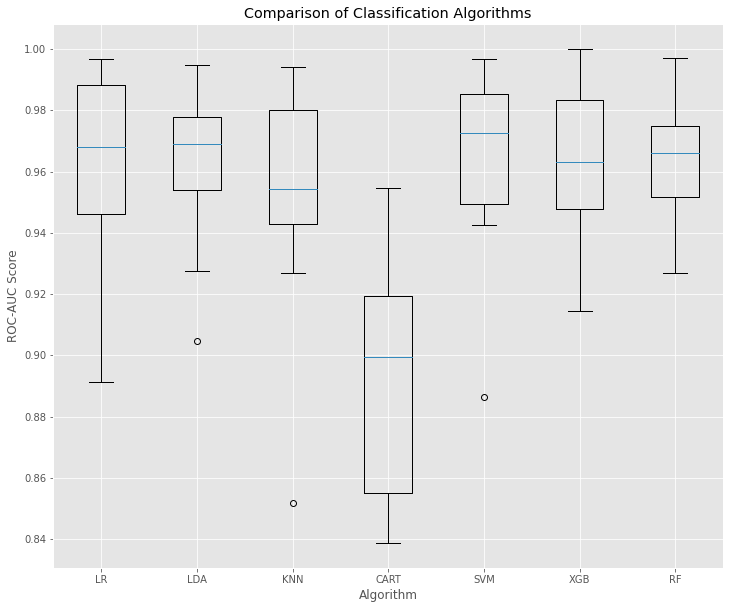

In [42]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
default_xticks=range(1,len(names)+1)
plt.xticks(default_xticks,names)
plt.show()